In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = 'white')

In [2]:
# Leo dataset
datos = pd.read_excel('altura_peso.xlsx')
datos.head()

,ID_persona,altura_cm,peso_kg
0,1,170.0,83.3
1,2,149.8,79.6
2,3,102.5,64.9
3,4,73.9,47.5
4,5,104.8,58.2


<Axes: xlabel='peso_kg', ylabel='altura_cm'>

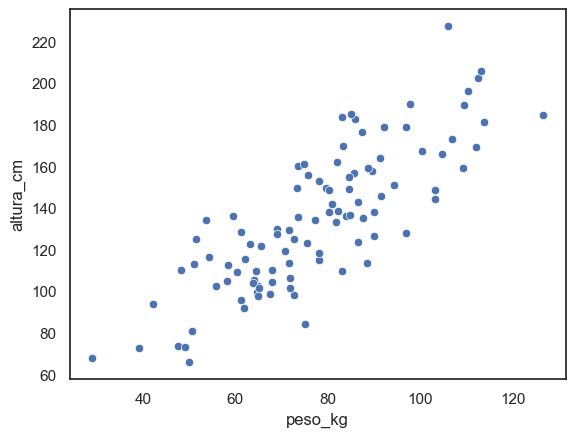

In [3]:
# Representamos los datos
sns.scatterplot(x = 'peso_kg', y = 'altura_cm', data = datos)

In [4]:
datos[['altura_cm', 'peso_kg']].corr() #calculamos coef. de correlación de Pearson

,altura_cm,peso_kg
altura_cm,1.000000,0.815281
peso_kg,0.815281,1.000000


In [5]:
# Ajustamos modelo
modelo = smf.ols(formula = 'altura_cm ~ peso_kg', data = datos).fit()

# Mostramos summary
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              altura_cm   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     194.3
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           5.48e-25
Time:                        18:44:15   Log-Likelihood:                -438.37
No. Observations:                 100   AIC:                             880.7
Df Residuals:                      98   BIC:                             885.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.6197      8.334      2.594      0.0

### Escribimos modelo:
$\hat{y} = 21.62 + 1.455~{peso}$

Por cada aumento de 1 kg en el peso de una persona de la población, se estima que la altura promedio aumenta en 1.455 cm.

### Representamos la recta

In [6]:
modelo.predict(datos)

0     142.828158
1     137.444351
2     116.054632
3      90.736189
4     106.305576
         ...    
95    127.258771
96    126.240213
97    175.858541
98    177.022608
99    138.462910
Length: 100, dtype: float64

In [7]:
datos['alturas_predichas'] = modelo.predict(datos)

In [8]:
datos.head()

,ID_persona,altura_cm,peso_kg,alturas_predichas
0,1,170.0,83.3,142.828158
1,2,149.8,79.6,137.444351
2,3,102.5,64.9,116.054632
3,4,73.9,47.5,90.736189
4,5,104.8,58.2,106.305576


In [9]:
datos['residuos'] = datos['altura_cm'] - datos['alturas_predichas']
datos.head()

,ID_persona,altura_cm,peso_kg,alturas_predichas,residuos
0,1,170.0,83.3,142.828158,27.171842
1,2,149.8,79.6,137.444351,12.355649
2,3,102.5,64.9,116.054632,-13.554632
3,4,73.9,47.5,90.736189,-16.836189
4,5,104.8,58.2,106.305576,-1.505576


<Axes: xlabel='peso_kg', ylabel='altura_cm'>

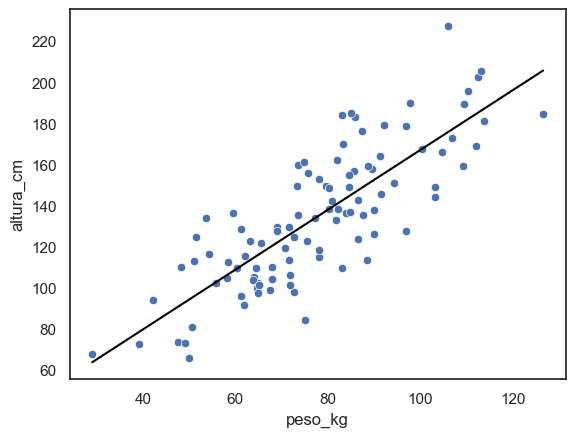

In [10]:
sns.scatterplot(x = 'peso_kg', y = 'altura_cm', data = datos)
sns.lineplot(x = 'peso_kg', y = 'alturas_predichas', data = datos, color = 'black')

<Axes: xlabel='peso_kg', ylabel='altura_cm'>

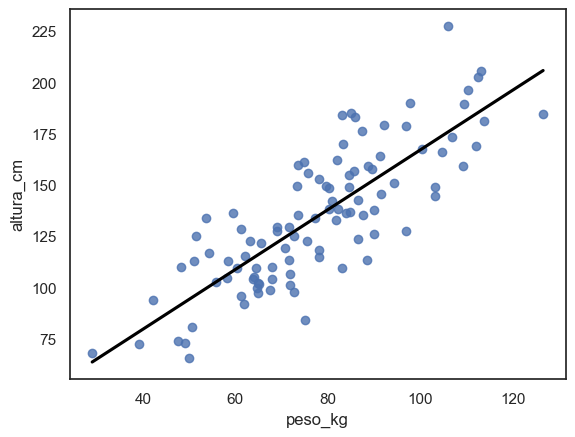

In [11]:
sns.regplot(x = 'peso_kg', y = 'altura_cm', data = datos, ci = False, line_kws = {'color' : 'black'})

### Usamos el modelo para predecir la altura de una persona que pesa 80 kg

In [12]:
dato_predecir = pd.DataFrame({'peso_kg' : [80]})
dato_predecir

,peso_kg
0,80


In [13]:
modelo.predict(dato_predecir)

0    138.026385
dtype: float64

In [14]:
21.62 + 1.455*80

138.02

In [15]:
modelo.predict(datos)

0     142.828158
1     137.444351
2     116.054632
3      90.736189
4     106.305576
         ...    
95    127.258771
96    126.240213
97    175.858541
98    177.022608
99    138.462910
Length: 100, dtype: float64